In [3]:
import pyprind
import pandas as pd
import os
import sys
from packaging import version
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# change the `basepath` to the directory of the
# unzipped movie dataset

basepath = "/Users/lukewilsen/Desktop/IEX/IEX_Training/NLP/aclImdb"

labels = {"pos": 1, "neg": 0}

# if the progress bar does not show, change stream=sys.stdout to stream=2
pbar = pyprind.ProgBar(50000, stream=sys.stdout)

df = pd.DataFrame()
for s in ("test", "train"):
    for l in ("pos", "neg"):
        path = os.path.join(basepath, s, l)
        for file in sorted(os.listdir(path)):
            with open(os.path.join(path, file), "r", encoding="utf-8") as infile:
                txt = infile.read()

            if version.parse(pd.__version__) >= version.parse("1.3.2"):
                x = pd.DataFrame([[txt, labels[l]]], columns=["review", "sentiment"])
                df = pd.concat([df, x], ignore_index=False)

            else:
                df = df.append([[txt, labels[l]]], ignore_index=True)
            pbar.update()
df.columns = ["review", "sentiment"]

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:58


In [4]:
df.head(3)

,review,sentiment
0,I went and saw this movie last night after bei...,1
0,Actor turned director Bill Paxton follows up h...,1
0,As a recreational golfer with some knowledge o...,1


In [2]:
import numpy as np


if version.parse(pd.__version__) >= version.parse("1.3.2"):
    df = df.sample(frac=1, random_state=0).reset_index(drop=True)

else:
    np.random.seed(0)
    df = df.reindex(np.random.permutation(df.index))

NameError: name 'df' is not defined

In [6]:
df.to_csv("movie_data.csv", index=False, encoding="utf-8")

In [4]:
import pandas as pd

df = pd.read_csv("movie_data.csv", encoding="utf-8")

# the following is necessary on some computers:
df = df.rename(columns={"0": "review", "1": "sentiment"})

df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [3]:
df.shape

(50000, 2)

In [4]:
df.iloc[0, 1]

1

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

count = CountVectorizer()
docs = np.array(
    [
        "The sun is shining",
        "The weather is sweet",
        "The sun is shining, the weather is sweet, and one and one is two",
    ]
)

bag = count.fit_transform(docs)

In [2]:
print(count.vocabulary_)

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


In [3]:
print(bag.toarray())

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [6]:
from sklearn.feature_extraction.text import TfidfTransformer

In [7]:
import re


def preprocessor(text):
    text = re.sub("<[^>]*>", "", text)
    emoticons = re.findall("(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)
    text = re.sub("[\W]+", " ", text.lower()) + " ".join(emoticons).replace("-", "")

    return text

In [8]:
preprocessor("</a>This :) is :( a test :-)!")
preprocessor(
    """In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich family used their influence to cover the murder for more than twenty years. However, a snoopy detective and convicted perjurer in disgrace was able to disclose how the hideous crime was committed. The screenplay shows the investigation of Mark and the last days of Martha in parallel, but there is a lack of the emotion in the dramatization. My vote is seven.<br /><br />Title (Brazil): Not Available"""
)
text = """In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich family used their influence to cover the murder for more than twenty years. However, a snoopy detective and convicted perjurer in disgrace was able to disclose how the hideous crime was committed. The screenplay shows the investigation of Mark and the last days of Martha in parallel, but there is a lack of the emotion in the dramatization. My vote is seven.<br /><br />Title (Brazil): Not Available"""

In [9]:
word_tokenize(text)

['In',
 '1974',
 ',',
 'the',
 'teenager',
 'Martha',
 'Moxley',
 '(',
 'Maggie',
 'Grace',
 ')',
 'moves',
 'to',
 'the',
 'high-class',
 'area',
 'of',
 'Belle',
 'Haven',
 ',',
 'Greenwich',
 ',',
 'Connecticut',
 '.',
 'On',
 'the',
 'Mischief',
 'Night',
 ',',
 'eve',
 'of',
 'Halloween',
 ',',
 'she',
 'was',
 'murdered',
 'in',
 'the',
 'backyard',
 'of',
 'her',
 'house',
 'and',
 'her',
 'murder',
 'remained',
 'unsolved',
 '.',
 'Twenty-two',
 'years',
 'later',
 ',',
 'the',
 'writer',
 'Mark',
 'Fuhrman',
 '(',
 'Christopher',
 'Meloni',
 ')',
 ',',
 'who',
 'is',
 'a',
 'former',
 'LA',
 'detective',
 'that',
 'has',
 'fallen',
 'in',
 'disgrace',
 'for',
 'perjury',
 'in',
 'O.J',
 '.',
 'Simpson',
 'trial',
 'and',
 'moved',
 'to',
 'Idaho',
 ',',
 'decides',
 'to',
 'investigate',
 'the',
 'case',
 'with',
 'his',
 'partner',
 'Stephen',
 'Weeks',
 '(',
 'Andrew',
 'Mitchell',
 ')',
 'with',
 'the',
 'purpose',
 'of',
 'writing',
 'a',
 'book',
 '.',
 'The',
 'locals',


In [9]:
df["review"] = df["review"].apply(preprocessor)

In [8]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]


tokenizer_porter("runners are running and thus they run")

['runner', 'are', 'run', 'and', 'thu', 'they', 'run']

In [11]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukewilsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords

stop = stopwords.words("english")
[w for w in tokenizer_porter("a runner likes running and runs a lot") if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

In [161]:
[
    w
    for w in [
        "in",
        "1974",
        "the",
        "teenag",
        "martha",
        "moxley",
        "maggi",
        "grace",
        "move",
        "to",
        "the",
        "high",
        "class",
        "area",
        "of",
        "bell",
        "haven",
        "greenwich",
        "connecticut",
        "on",
        "the",
        "mischief",
        "night",
        "eve",
        "of",
        "halloween",
        "she",
        "wa",
        "murder",
        "in",
        "the",
        "backyard",
        "of",
        "her",
        "hous",
        "and",
        "her",
        "murder",
        "remain",
        "unsolv",
        "twenti",
        "two",
        "year",
        "later",
        "the",
        "writer",
        "mark",
        "fuhrman",
        "christoph",
        "meloni",
        "who",
        "is",
        "a",
        "former",
        "la",
        "detect",
        "that",
        "ha",
        "fallen",
        "in",
        "disgrac",
        "for",
        "perjuri",
        "in",
        "o",
        "j",
        "simpson",
        "trial",
        "and",
        "move",
        "to",
        "idaho",
        "decid",
        "to",
        "investig",
        "the",
        "case",
        "with",
        "hi",
        "partner",
        "stephen",
        "week",
        "andrew",
        "mitchel",
        "with",
        "the",
        "purpos",
        "of",
        "write",
        "a",
        "book",
        "the",
        "local",
        "squirm",
        "and",
        "do",
        "not",
        "welcom",
        "them",
        "but",
        "with",
        "the",
        "support",
        "of",
        "the",
        "retir",
        "detect",
        "steve",
        "carrol",
        "robert",
        "forster",
        "that",
        "wa",
        "in",
        "charg",
        "of",
        "the",
        "investig",
        "in",
        "the",
        "70",
        "s",
        "they",
        "discov",
        "the",
        "crimin",
        "and",
        "a",
        "net",
        "of",
        "power",
        "and",
        "money",
        "to",
        "cover",
        "the",
        "murder",
        "murder",
        "in",
        "greenwich",
        "is",
        "a",
        "good",
        "tv",
        "movi",
        "with",
        "the",
        "true",
        "stori",
        "of",
        "a",
        "murder",
        "of",
        "a",
        "fifteen",
        "year",
        "old",
        "girl",
        "that",
        "wa",
        "commit",
        "by",
        "a",
        "wealthi",
        "teenag",
        "whose",
        "mother",
        "wa",
        "a",
        "kennedi",
        "the",
        "power",
        "and",
        "rich",
        "famili",
        "use",
        "their",
        "influenc",
        "to",
        "cover",
        "the",
        "murder",
        "for",
        "more",
        "than",
        "twenti",
        "year",
        "howev",
        "a",
        "snoopi",
        "detect",
        "and",
        "convict",
        "perjur",
        "in",
        "disgrac",
        "wa",
        "abl",
        "to",
        "disclos",
        "how",
        "the",
        "hideou",
        "crime",
        "wa",
        "commit",
        "the",
        "screenplay",
        "show",
        "the",
        "investig",
        "of",
        "mark",
        "and",
        "the",
        "last",
        "day",
        "of",
        "martha",
        "in",
        "parallel",
        "but",
        "there",
        "is",
        "a",
        "lack",
        "of",
        "the",
        "emot",
        "in",
        "the",
        "dramat",
        "my",
        "vote",
        "is",
        "seven",
        "titl",
        "brazil",
        "not",
        "avail",
    ]
    if w not in stop
]

['1974',
 'teenag',
 'martha',
 'moxley',
 'maggi',
 'grace',
 'move',
 'high',
 'class',
 'area',
 'bell',
 'greenwich',
 'connecticut',
 'mischief',
 'night',
 'eve',
 'halloween',
 'wa',
 'murder',
 'backyard',
 'hous',
 'murder',
 'remain',
 'unsolv',
 'twenti',
 'two',
 'year',
 'later',
 'writer',
 'mark',
 'fuhrman',
 'christoph',
 'meloni',
 'former',
 'la',
 'detect',
 'ha',
 'fallen',
 'disgrac',
 'perjuri',
 'j',
 'simpson',
 'trial',
 'move',
 'idaho',
 'decid',
 'investig',
 'case',
 'hi',
 'partner',
 'stephen',
 'week',
 'andrew',
 'mitchel',
 'purpos',
 'write',
 'book',
 'local',
 'squirm',
 'welcom',
 'support',
 'retir',
 'detect',
 'steve',
 'carrol',
 'robert',
 'forster',
 'wa',
 'charg',
 'investig',
 '70',
 'discov',
 'crimin',
 'net',
 'power',
 'money',
 'cover',
 'murder',
 'murder',
 'greenwich',
 'good',
 'tv',
 'movi',
 'true',
 'stori',
 'murder',
 'fifteen',
 'year',
 'old',
 'girl',
 'wa',
 'commit',
 'wealthi',
 'teenag',
 'whose',
 'mother',
 'wa',
 '

# Logistic Reg for doc classification

In [10]:
X_train = df.loc[:25000, "review"].values
y_train = df.loc[:25000, "sentiment"].values
X_test = df.loc[25000:, "review"].values
y_test = df.loc[25000:, "sentiment"].values

In [11]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

small_param_grid = [
    {
        "vect__ngram_range": [(1, 1)],
        "vect__stop_words": [None],
        "vect__tokenizer": [tokenizer_porter],
        "clf__penalty": ["l2"],
        "clf__C": [1.0, 10.0],
    },
    {
        "vect__ngram_range": [(1, 1)],
        "vect__stop_words": [stop, None],
        "vect__tokenizer": [tokenizer_porter],
        "vect__use_idf": [False],
        "vect__norm": [None],
        "clf__penalty": ["l2"],
        "clf__C": [1.0, 10.0],
    },
]

lr_tfidf = Pipeline(
    [
        ("vect", tfidf),
        ("clf", LogisticRegression(solver="liblinear")),
    ]
)

gs_lr_tfidf = GridSearchCV(
    lr_tfidf, small_param_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1
)

In [13]:
tfidf.fit_transform(X_train)

<25001x96510 sparse matrix of type '<class 'numpy.float64'>'
	with 3533625 stored elements in Compressed Sparse Row format>

In [22]:
import pickle

with open("nlp_vect.pkl", "wb") as f:
    pickle.dump(tfidf, f)

Don't run below code

In [20]:
# gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is no

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0], 'clf__penalty': ['l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [None],
                          'vect__tokenizer': [<function tokenizer_porter at 0x149c59e40>]},
                         {'clf__C': [1.0, 10.0], 'clf__penalty'...
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
                                                'herself', 'it', "it's", 'its',
                                                'itself', ...],
                                               None],
                          'vect__tokenizer': [<function tokenizer_porter at 0x149c59e40>],
                          'vect__use_idf': [False]}],
             scoring='accuracy', verbose=1)

In [15]:
print(f"CV accuracy: {gs_lr_tfidf.best_score_:.3f}")
clf = gs_lr_tfidf.best_estimator_
print(f"Test Accuracy: {clf.score(X_test,y_test):.3f}")

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [41]:
# print(gs_lr_tfidf.best_params_)
best_params = {
    "clf__C": 10.0,
    "clf__penalty": "l2",
    "vect__ngram_range": (1, 1),
    "vect__stop_words": None,
    "vect__tokenizer": None,
}
lr_tfidf.set_params(**best_params)

Pipeline(steps=[('vect', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression(C=10.0, solver='liblinear'))])

In [42]:
lr_tfidf.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression(C=10.0, solver='liblinear'))])

In [48]:
# above model fit on X_train and can predict something in the form of X_test
# so input from streamlit app needs to be in the same format as X_test


lr_tfidf.predict(np.array(["I hate you"]))

array([1])

In [36]:
X_test.shape

(25000,)

In [49]:
y_pred = lr_tfidf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

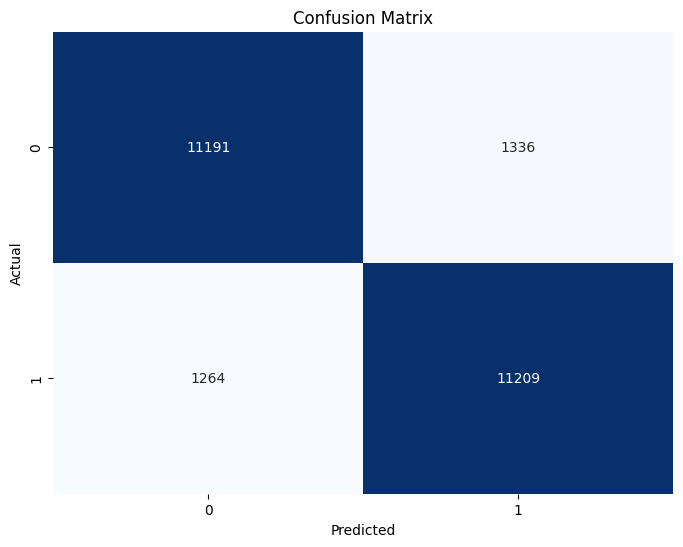

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [51]:
lr_tfidf.score(X_test, y_test)

0.896

In [53]:
import pickle

with open("nlp_model.pkl", "wb") as f:
    pickle.dump(lr_tfidf, f)

In [20]:
app_samples = df.head(10).iloc[:, 0]
app_samples
predictions = lr_tfidf.predict(app_samples)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [21]:
# 200 reviews
sample1 = df.sample(n=5000, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(
    sample1["review"], sample1["sentiment"], test_size=0.3, random_state=123
)
lr_tfidf.fit(X_train, y_train)
predictions = lr_tfidf.predict(X_test)
nlp_acc_1 = accuracy_score(predictions, y_test)
print(nlp_acc_1)

/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.85


In [48]:
import numpy as np
import re
from nltk.corpus import stopwords

stop = stopwords.words("english")


def tokenizer(text):
    text = re.sub("<[^>]*>", "", text)
    emoticons = re.findall("(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)
    text = re.sub("[\W]+", " ", text.lower()) + " ".join(emoticons).replace("-", "")
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized


def stream_docs(path):
    with open(path, "r", encoding="utf-8") as csv:
        next(csv)  # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

In [49]:
next(stream_docs(path="movie_data.csv"))

('"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />""Murder in Greenwich"" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich f

In [50]:
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

In [51]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier

vect = HashingVectorizer(
    decode_error="ignore", n_features=2**21, preprocessor=None, tokenizer=tokenizer
)
clf = SGDClassifier(loss="log_loss", random_state=1)
doc_stream = stream_docs(path="movie_data.csv")

In [52]:
import pyprind

pbar = pyprind.ProgBar(45, stream=sys.stdout)

classes = np.array([0, 1])
for _ in range(45):
    X_train, y_train = get_minibatch(doc_stream, size=1000)
    if not X_train:
        break
    X_train = vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:21


In [53]:
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test = vect.transform(X_test)
print(f"Accuracy: {clf.score(X_test, y_test):.3f}")

Accuracy: 0.868


In [103]:
clf = clf.partial_fit(X_test, y_test)

# Latent Dirichlet Allocation

In [122]:
df = pd.read_csv("movie_data.csv", encoding="utf-8")
df = df.rename(columns={"0": "review", "1": "sentiment"})
df.head(3)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0


In [129]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words="english", max_df=0.1, max_features=5000)
X = count.fit_transform(df["review"].values)

In [130]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=10, random_state=123, learning_method="batch"
)
X_topics = lda.fit_transform(X)

In [131]:
lda.components_.shape

(10, 5000)

In [132]:
n_top_words = 5
feature_names = count.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {(topic_idx + 1)}:")
    print(
        " ".join([feature_names[i] for i in topic.argsort()[: -n_top_words - 1 : -1]])
    )

Topic 1:
worst minutes awful script stupid
Topic 2:
family mother father children girl
Topic 3:
american war dvd music tv
Topic 4:
human audience cinema art sense
Topic 5:
police guy car dead murder
Topic 6:
horror house sex girl woman
Topic 7:
role performance comedy actor performances
Topic 8:
series episode war episodes tv
Topic 9:
book version original read novel
Topic 10:
action fight guy guys cool


In [133]:
horror = X_topics[:, 5].argsort()[::-1]

for (
    iter_idx,
    movie_idx,
) in enumerate(horror[:3]):
    print(f"\nHorror movie #{(iter_idx + 1)}:")
    print(df["review"][movie_idx][:300], "...")


Horror movie #1:
House of Dracula works from the same basic premise as House of Frankenstein from the year before; namely that Universal's three most famous monsters; Dracula, Frankenstein's Monster and The Wolf Man are appearing in the movie together. Naturally, the film is rather messy therefore, but the fact that ...

Horror movie #2:
Okay, what the hell kind of TRASH have I been watching now? "The Witches' Mountain" has got to be one of the most incoherent and insane Spanish exploitation flicks ever and yet, at the same time, it's also strangely compelling. There's absolutely nothing that makes sense here and I even doubt there  ...

Horror movie #3:
<br /><br />Horror movie time, Japanese style. Uzumaki/Spiral was a total freakfest from start to finish. A fun freakfest at that, but at times it was a tad too reliant on kitsch rather than the horror. The story is difficult to summarize succinctly: a carefree, normal teenage girl starts coming fac ...


In [4]:
sample_reviews = df.head(5)

sample_reviews.iloc[:, 0]

predictions = lr_tfidf.predict(sample_reviews.iloc[:, 0])

correct = sum(
    [1 for i in range(len(predictions)) if sample_reviews.iloc[i, 1] == predictions[i]]
)
reviews = [sample_reviews.iloc[i, 0] for i in range(len(predictions))]
accuracy = correct / len(predictions)

print(f"Accuracy: {accuracy}")

reviews

NameError: name 'lr_tfidf' is not defined

In [14]:
df.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [38]:
dobby_mod = pickle.load(
    open("/Users/lukewilsen/Desktop/IEX/IEX_Training/NLP/NLP_model.pkl", "rb")
)

/Users/lukewilsen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [39]:
dobby_mod.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}